# Practical Week 6: Multi-label Classification

In a multi-label classification task, the documents may have one or more labels (or sometimes none). An example of multi-label classification of images is to assign keywords to images. This blog post shows an example of multi-label text classification using scikit-learn. The post describes multiple methods you can use for the task. In this practical we will use the same data:

* [Multi-label Text Classification](https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8)


The following code loads the [CMU Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/) and prepares it for use in the practical exercises. The corpus consists of movie plots and additional information, including the genre (or genres) of each movie. Your task will be to determine the genres of a movie, given the text of the movie plot. For this code to work, the following file must be in the same folder as this notebook:
* [MovieSummaries.zip](MovieSummaries.zip)

In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
zip_file = ZipFile('MovieSummaries.zip')
metadata = pd.read_csv(zip_file.open('MovieSummaries/movie.metadata.tsv'), sep='\t', header=None)
metadata.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]
genres = metadata[["movie_id","movie_name","genre"]]
genres.head()

,movie_id,movie_name,genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,Brun bitter,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,White Of The Eye,"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,A Woman in Flames,"{""/m/07s9rl0"": ""Drama""}"


In [3]:
metadata.head()

,movie_id,1,movie_name,3,4,5,6,7,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Looking at one row only with movie_id = 975900
genres.loc[genres['movie_id']==975900]

,movie_id,movie_name,genre
0,975900,Ghosts of Mars,"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [5]:
plots = pd.read_csv(zip_file.open('MovieSummaries/plot_summaries.txt'), sep='\t', header=None)
plots.columns = ["movie_id", "plot"]
plots.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [6]:
plots.loc[plots['movie_id']==975900]

,movie_id,plot
22379,975900,"Set in the second half of the 22nd century, th..."


In [7]:
# merging genres and plots on movie_id
movies = pd.merge(plots, genres, on = 'movie_id')
movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [8]:
movies.loc[movies['movie_id']==975900].iloc[0]['genre']


'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

In [9]:
# Extracts values from dictionary representation (JSON representation) in genre column

import json

genres_lists = []

for i in movies['genre']:
   
   genres_lists.append(list(json.loads(i).values()))

movies['genre'] = genres_lists

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema..."


The following code uses scikit-learn's `MultiLabelBinarizer` to generate a column for each movie genre:

In [10]:

from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()

multilabel_binarizer.fit(movies['genre'])

 # transform target variable

y = multilabel_binarizer.transform(movies['genre'])

for idx, genre in enumerate(multilabel_binarizer.classes_):
    movies[genre] = y[:,idx]
    
movies.head()

C:\Users\jakev_000\AppData\Local\Temp\ipykernel_19600\3832944372.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[genre] = y[:,idx]
C:\Users\jakev_000\AppData\Local\Temp\ipykernel_19600\3832944372.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movies[genre] = y[:,idx]
C:\Users\jakev_000\AppData\Local\Temp\ipykernel_19600\3832944372.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

,movie_id,plot,movie_name,genre,Absurdism,Acid western,Action,Action Comedy,Action Thrillers,Action/Adventure,...,Werewolf fiction,Western,Whodunit,Women in prison films,Workplace Comedy,World History,World cinema,Wuxia,Z movie,Zombie Film
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"[Drama, World cinema]",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"[Action/Adventure, Science Fiction, Action, Dr...",0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"[Musical, Action, Drama, Bollywood]",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"[Screwball comedy, Comedy]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"[Crime Fiction, Drama, Docudrama, World cinema...",0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Finally, the following code uses scikit-learn to split the data into a train set, a dev-test set, and a development set.

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(movies, random_state=42, test_size=0.30, shuffle=True)
train, devtest = train_test_split(train, random_state=42, test_size=0.30, shuffle=True)

print("Training size:", len(train))
print("Devtest size:", len(devtest))
print("Test size:", len(test))

Training size: 20679
Devtest size: 8863
Test size: 12662


In [12]:
train_texts = list(train['plot'])
train_labels = train.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

In [13]:
devtest_texts = list(devtest['plot'])
devtest_labels = devtest.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

In [14]:
test_texts = list(test['plot'])
test_labels = test.drop(labels=['movie_id', 'movie_name', 'plot', 'genre'], axis=1).to_numpy()

# Exercise: A Simple Classifier

Design a TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept the tf.idf encoding of the input text, using the top 8000 words. For this, you can use scikit-learn's `TfidfVectorizer` with the option `max_features=8000`.
2. An output layer with as many cells as possible movie genres (there are 363 distinct genres, can you find out how to calculate the number of distinct genres?).

Each output cell will act as a binary classifier, so the activation function should be `sigmoid`, and the loss function should be `binary_crossentropy`.

Train your neural model using the training set. Determine the optimal number of epochs by examining the accuracy results on the devtest set. The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
dense_2 (Dense)              (None, 363)               2904363   
=================================================================
Total params: 2,904,363
Trainable params: 2,904,363
Non-trainable params: 0
```

In [15]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(input='contents', max_features=8000)

train_tfidf=tfidf.fit_transform(train_texts).toarray()

devtest_tfidf=tfidf.fit_transform(devtest_texts).toarray()

test_tfidf=tfidf.fit_transform(test_texts).toarray()

print(tfidf.get_feature_names_out(),'\n')
print(len(train_tfidf[0]),'\n')
print(train_texts[0],'\n')

for c,i in enumerate(train_tfidf[0]):
  if i > 0.0:
    token = tfidf.get_feature_names_out()[c]
    print([token,c,i])

['00' '000' '01' ... 'zone' 'zoo' 'zorro'] 

8000 

A young relative of a rich family was love strucked with a theatrical lady with the different untamed character and pressures with his family that did not had the time to come. As the movie did not have from it greatest from their family, received to bring an abundant laughs due to its much great stars of the movie. 

['amir', 321, 0.058267089228515576]
['amongst', 326, 0.041026806061116146]
['arrangements', 477, 0.05626209580342674]
['breaking', 954, 0.14746362401594007]
['champ', 1244, 0.1678251531958578]
['college', 1465, 0.11726007206072687]
['diego', 2047, 0.29486495019444825]
['dig', 2055, 0.15907999095059763]
['duel', 2266, 0.1358662448758387]
['farley', 2657, 0.300757061053374]
['frightening', 2940, 0.11939870129625942]
['greeted', 3151, 0.1516386003583061]
['greg', 3153, 0.22277702900703275]
['hammond', 3222, 0.09531437641894679]
['heads', 3296, 0.08149053322390996]
['holding', 3398, 0.04907516269191019]
['james', 3784, 0.066

In [16]:
# Write your code here
import tensorflow as tf

print(tf.config.list_physical_devices())

print(tf.keras.__version__)

from tensorflow.keras import models,layers

simple_nn=models.Sequential()
simple_nn.add(layers.Dense(363,activation='sigmoid',input_shape=(len(tfidf.get_feature_names_out()),)))
simple_nn.summary()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.8.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 363)               2904363   
                                                                 
Total params: 2,904,363
Trainable params: 2,904,363
Non-trainable params: 0
_________________________________________________________________


In [17]:
simple_nn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [18]:


history=simple_nn.fit(train_tfidf,
                      np.array(train_labels),
                      epochs=50,
                      batch_size=200,
                      validation_data= (devtest_tfidf,np.array(devtest_labels))
                      )

Epoch 1/50
104/104 [==============================] - 2s 12ms/step - loss: 0.5218 - acc: 0.1659 - val_loss: 0.4556 - val_acc: 0.1688
Epoch 2/50
104/104 [==============================] - 1s 8ms/step - loss: 0.3105 - acc: 0.1743 - val_loss: 0.3143 - val_acc: 0.1688
Epoch 3/50
104/104 [==============================] - 1s 8ms/step - loss: 0.1914 - acc: 0.1743 - val_loss: 0.2249 - val_acc: 0.1688
Epoch 4/50
104/104 [==============================] - 1s 8ms/step - loss: 0.1258 - acc: 0.1745 - val_loss: 0.1689 - val_acc: 0.1688
Epoch 5/50
104/104 [==============================] - 1s 9ms/step - loss: 0.0897 - acc: 0.1753 - val_loss: 0.1333 - val_acc: 0.1687
Epoch 6/50
104/104 [==============================] - 1s 9ms/step - loss: 0.0694 - acc: 0.1764 - val_loss: 0.1100 - val_acc: 0.1685
Epoch 7/50
104/104 [==============================] - 1s 9ms/step - loss: 0.0575 - acc: 0.1782 - val_loss: 0.0942 - val_acc: 0.1692
Epoch 8/50
104/104 [==============================] - 1s 9ms/step - loss: 0

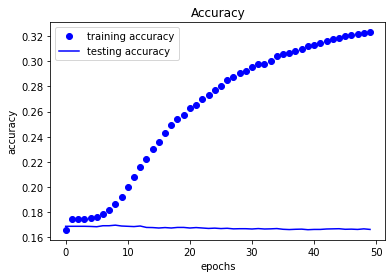

In [19]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(history.history['acc'],'bo', label='training accuracy')
plt.plot(history.history['val_acc'],'b', label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


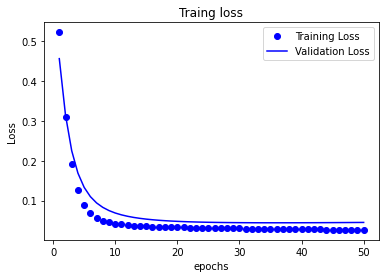

In [20]:
plt.clf()
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Traing loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

## Exercise: A Recurrent Neural Network

Implement a recurrent neural network that has the following sequence of layers:

1. An embedding layer that generates embedding vectors with 100 dimensions. Set the maximum input length to 100 words.
2. A LSTM layer that generates an output of 120 dimensions.
3. The final output layer that has the 363 cells with a sigmoid activation.

The model summary should look like this:

```
Layer (type)                 Output Shape              Param #   
=================================================================
embedding_4 (Embedding)      (None, 100, 100)          800000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               106080    
_________________________________________________________________
dense_7 (Dense)              (None, 363)               43923     
=================================================================
Total params: 950,003
Trainable params: 950,003
Non-trainable params: 0
```

For this exercise, use Keras' tokenizer with the option `num_words=8000` (so that you use the same vocabulary size as in the previous exercise).


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words=8000

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_texts)

# print("Word Index:",tokenizer.word_index[:100])

In [22]:
train_sequences = tokenizer.texts_to_sequences(train_texts)

devtest_sequences = tokenizer.texts_to_sequences(devtest_texts)

test_sequences = tokenizer.texts_to_sequences(test_texts)

print(len(train_sequences))
print(train_texts[0])
print(train_sequences[0])
print(len(train_sequences[0]))
print(len(devtest_sequences))
print(devtest_sequences[0])
print(len(test_sequences))
print(len(test_sequences[0]))

20679
A young relative of a rich family was love strucked with a theatrical lady with the different untamed character and pressures with his family that did not had the time to come. As the movie did not have from it greatest from their family, received to bring an abundant laughs due to its much great stars of the movie.
[4, 85, 4314, 5, 4, 529, 71, 36, 58, 11, 4, 7429, 681, 11, 1, 606, 763, 3, 6166, 11, 8, 71, 12, 408, 38, 54, 1, 56, 2, 171, 17, 1, 198, 408, 38, 45, 23, 27, 3290, 23, 26, 71, 1712, 2, 441, 24, 3504, 300, 2, 182, 222, 440, 1908, 5, 1, 198]
56
8863
[6, 277, 7, 4, 154, 225, 2, 4556, 4, 53, 380, 61, 754, 6, 8, 71, 284, 3, 1521, 19, 261, 7, 24, 3091, 474, 1216, 2632, 15, 3788, 829, 7, 10, 252, 10, 61, 4758, 28, 10, 14, 672, 856, 40, 36, 10, 5137, 994, 14, 2162, 13, 3, 10, 58, 14, 10, 208, 7, 439, 3, 683, 208, 843, 18, 3408, 16, 83, 23, 575, 2, 1429, 83, 4, 583, 23, 843, 7, 40, 843, 10, 58, 14, 1365, 4, 2132, 496, 72, 29, 1365, 131, 843, 500, 4, 2073, 5, 3, 4435, 70, 843, 1

In [23]:
maxlen=100

training_vectors=pad_sequences(train_sequences,maxlen=maxlen)

devtest_vectors=pad_sequences(devtest_sequences,maxlen=maxlen)

test_vectors=pad_sequences(test_sequences,maxlen=maxlen)

In [24]:
# num_words = 8000 
import numpy as np
embedding_dim=100 # Integer. Dimension of the dense embedding

lstm_dim=120 #Integer. Dimensionality of output variable

lstm_model=models.Sequential()

lstm_model.add(layers.Embedding(8000,embedding_dim,input_length=maxlen))
lstm_model.add(layers.LSTM(lstm_dim))

lstm_model.add(layers.Dense(363,activation='sigmoid'))

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          800000    
                                                                 
 lstm (LSTM)                 (None, 120)               106080    
                                                                 
 dense_1 (Dense)             (None, 363)               43923     
                                                                 
Total params: 950,003
Trainable params: 950,003
Non-trainable params: 0
_________________________________________________________________


In [25]:
lstm_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history = lstm_model.fit(training_vectors,
                         np.array(train_labels),
                         epochs=50,
                         batch_size=200,
                         validation_data= (devtest_vectors,np.array(devtest_labels))
                      )

Epoch 1/50
104/104 [==============================] - 4s 20ms/step - loss: 0.0900 - accuracy: 0.1557 - val_loss: 0.0376 - val_accuracy: 0.1688
Epoch 2/50
104/104 [==============================] - 2s 15ms/step - loss: 0.0374 - accuracy: 0.1743 - val_loss: 0.0375 - val_accuracy: 0.1688
Epoch 3/50
104/104 [==============================] - 1s 14ms/step - loss: 0.0373 - accuracy: 0.1743 - val_loss: 0.0375 - val_accuracy: 0.1688
Epoch 4/50
104/104 [==============================] - 2s 15ms/step - loss: 0.0373 - accuracy: 0.1743 - val_loss: 0.0374 - val_accuracy: 0.1688
Epoch 5/50
104/104 [==============================] - 1s 14ms/step - loss: 0.0372 - accuracy: 0.1743 - val_loss: 0.0374 - val_accuracy: 0.1688
Epoch 6/50
104/104 [==============================] - 1s 14ms/step - loss: 0.0371 - accuracy: 0.1743 - val_loss: 0.0374 - val_accuracy: 0.1688
Epoch 7/50
104/104 [==============================] - 1s 14ms/step - loss: 0.0370 - accuracy: 0.1743 - val_loss: 0.0374 - val_accuracy: 0.1688

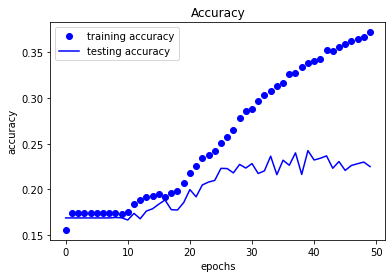

In [26]:
plt.clf()
plt.plot(history.history['accuracy'],'bo', label='training accuracy')
plt.plot(history.history['val_accuracy'],'b', label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

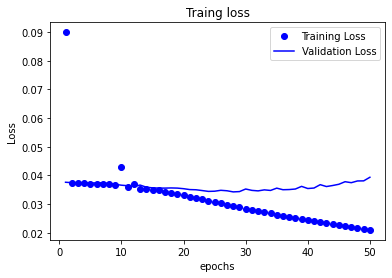

In [27]:
plt.clf()
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Traing loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

## Optional Exercise: A More Complex Neural Network

Try to improve your classifiers by trying some of these options:

1. Use a different number of words, number of embeddings dimensions, etc.
2. Add hidden layers.
2. Stack LSTM layers (this may make the system much slower to train; use it only if your computer has a GPU).
3. Use pre-trained word embeddings.
4. Use BERT from the Huggingface `transformers` library https://github.com/huggingface/transformers (this may make the system much slower to train; use it only if your computer has a GPU).